In [21]:
import pandas as pd

# Load the dataset
weather_df = pd.read_csv('GlobalWeatherRepository.csv')

print("Missing values before cleaning:")
print(weather_df.isnull().sum())

# Fill missing values using forward fill for simplicity (can be adjusted based on your needs)
weather_df.fillna(method='ffill', inplace=True)

# Convert 'last_updated' to datetime
weather_df['last_updated'] = pd.to_datetime(weather_df['last_updated'])

# Ensure numeric fields are in the correct format
weather_df['temperature_celsius'] = pd.to_numeric(weather_df['temperature_celsius'], errors='coerce')
weather_df['humidity'] = pd.to_numeric(weather_df['humidity'], errors='coerce')
weather_df['wind_kph'] = pd.to_numeric(weather_df['wind_kph'], errors='coerce')
weather_df['precip_mm'] = pd.to_numeric(weather_df['precip_mm'], errors='coerce')

# Drop redundant columns (example)
weather_df = weather_df.drop(['temperature_fahrenheit', 'pressure_in', 'visibility_miles'], axis=1)

print("Data cleaning complete.")

Missing values before cleaning:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozon

/var/folders/3l/d24nkjvd3jx71m5q9_915qm00000gn/T/ipykernel_96809/2638057707.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df.fillna(method='ffill', inplace=True)


Task 1: Generate Summary - Top 5 Hottest and Coldest Locations

In [22]:
# Group by country and calculate average temperature and humidity
avg_temp_humidity = weather_df.groupby('country')[['temperature_celsius', 'humidity']].mean()

print("\nAverage Temperature and Humidity by Country:")
print(avg_temp_humidity)


Average Temperature and Humidity by Country:
             temperature_celsius   humidity
country                                    
Afghanistan            27.441060  21.675497
Albania                30.376159  44.622517
Algeria                28.769333  50.820000
Andorra                18.373510  49.801325
Angola                 25.861589  68.516556
...                          ...        ...
Гватемала              15.900000  95.000000
Польша                 24.200000  56.000000
Турция                 34.000000  44.000000
كولومبيا               23.100000  95.000000
火鸡                     29.700000  24.000000

[210 rows x 2 columns]


In [ ]:
# Combined bar chart for hottest and coldest locations
plt.figure(figsize=(12, 8))

# Create subplots
plt.subplot(2, 1, 1)
sns.barplot(x=top_hottest.index, y=top_hottest.values, palette='OrRd')
plt.title('Top 5 Hottest Locations', fontsize=16)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y')

plt.subplot(2, 1, 2)
sns.barplot(x=top_coldest.index, y=top_coldest.values, palette='Blues')
plt.title('Top 5 Coldest Locations', fontsize=16)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

/var/folders/3l/d24nkjvd3jx71m5q9_915qm00000gn/T/ipykernel_96809/785328495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hottest.index, y=top_hottest.values, palette='OrRd')
/var/folders/3l/d24nkjvd3jx71m5q9_915qm00000gn/T/ipykernel_96809/785328495.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coldest.index, y=top_coldest.values, palette='Blues')


In [10]:
# Group by country and calculate average temperature and humidity
avg_temp_humidity = weather_df.groupby('country')[['temperature_celsius', 'humidity']].mean()

print("\nAverage Temperature and Humidity by Country:")
print(avg_temp_humidity)


Average Temperature and Humidity by Country:
             temperature_celsius   humidity
country                                    
Afghanistan            27.441060  21.675497
Albania                30.376159  44.622517
Algeria                28.769333  50.820000
Andorra                18.373510  49.801325
Angola                 25.861589  68.516556
...                          ...        ...
Гватемала              15.900000  95.000000
Польша                 24.200000  56.000000
Турция                 34.000000  44.000000
كولومبيا               23.100000  95.000000
火鸡                     29.700000  24.000000

[210 rows x 2 columns]


Task 2: Group Data by Country and Compute Average Temperature and Humidity

/Users/apple/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apple/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


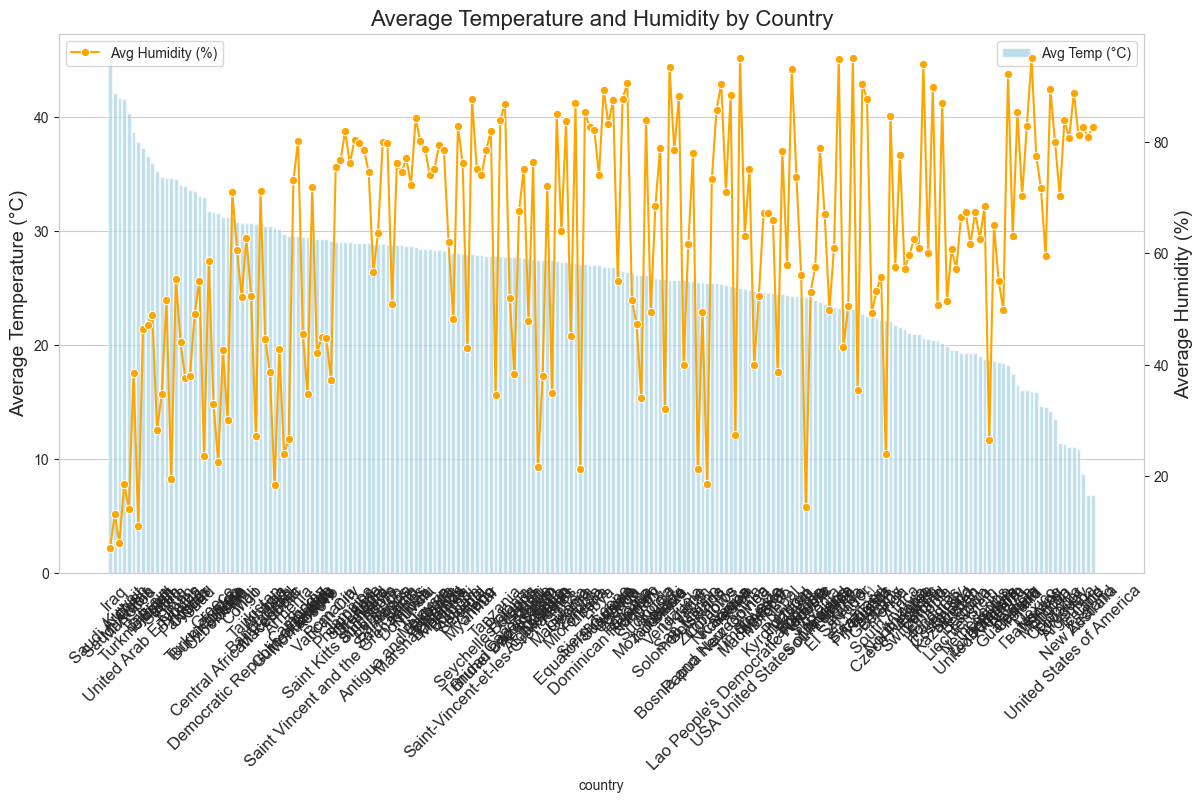

In [11]:
# Plotting average temperature and humidity by country
avg_temp_humidity = avg_temp_humidity.sort_values(by='temperature_celsius', ascending=False)

plt.figure(figsize=(14, 7))

# Create a bar plot for average temperature
sns.barplot(x=avg_temp_humidity.index, y=avg_temp_humidity['temperature_celsius'], color='skyblue', label='Avg Temp (°C)', alpha=0.6)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Create a second y-axis for average humidity
ax2 = plt.gca().twinx()
sns.lineplot(x=avg_temp_humidity.index, y=avg_temp_humidity['humidity'], color='orange', label='Avg Humidity (%)', marker='o', ax=ax2)
ax2.set_ylabel('Average Humidity (%)', fontsize=14)

plt.title('Average Temperature and Humidity by Country', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(axis='y')
plt.legend()
plt.show()

Task 3: Plotting Visualizations - Histogram and Line Graph

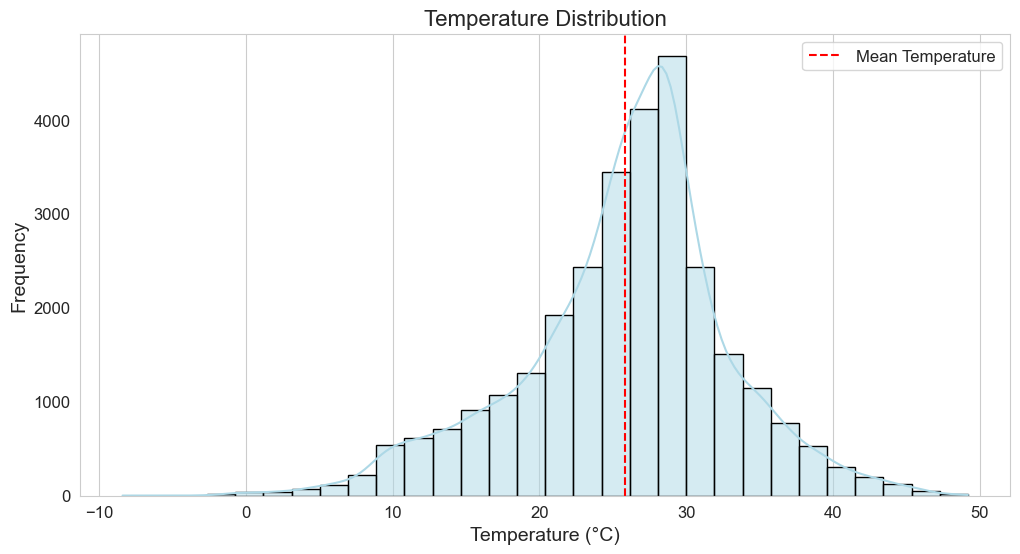

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(weather_df['temperature_celsius'], bins=30, kde=True, color='lightblue', edgecolor='black')
plt.title('Temperature Distribution', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.axvline(weather_df['temperature_celsius'].mean(), color='red', linestyle='--', label='Mean Temperature')
plt.legend(fontsize=12)
plt.show()

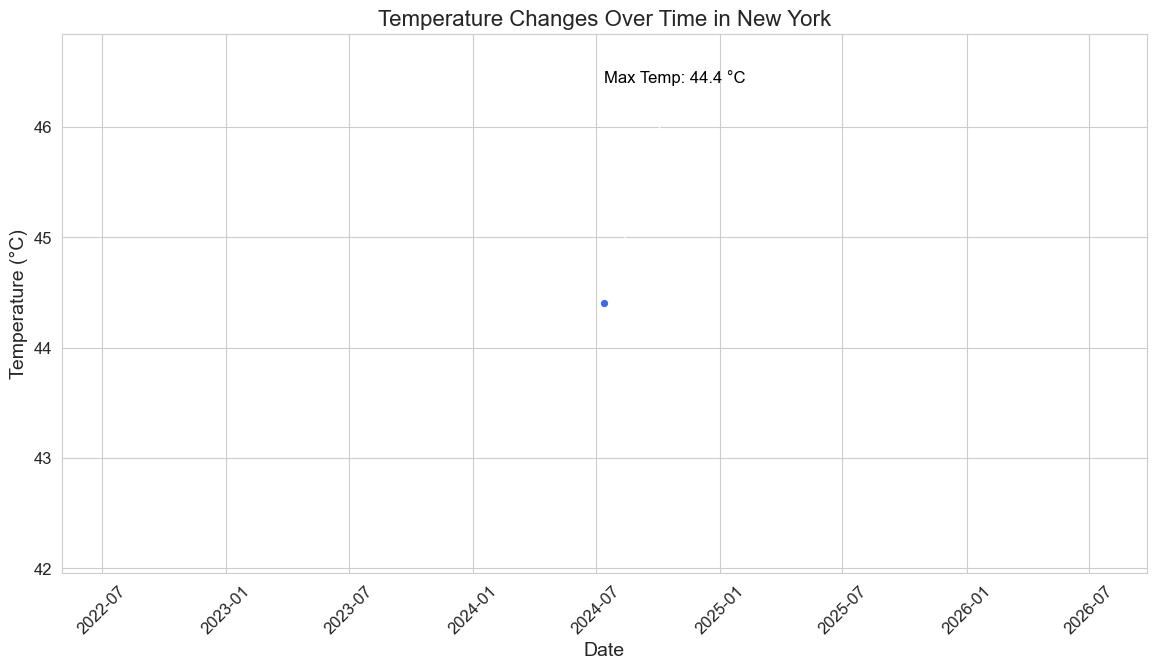

In [20]:

location_data = weather_df[weather_df['location_name'] == 'Kuwait']

plt.figure(figsize=(14, 7))
sns.lineplot(data=location_data, x='last_updated', y='temperature_celsius', marker='o', color='royalblue', linewidth=2)
plt.title('Temperature Changes Over Time in New York', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

max_temp = location_data['temperature_celsius'].max()
max_temp_date = location_data.loc[location_data['temperature_celsius'].idxmax(), 'last_updated']
plt.annotate(f'Max Temp: {max_temp} °C', xy=(max_temp_date, max_temp), xytext=(max_temp_date, max_temp + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')

plt.show()